# Standard Softmax _ MonteCarlo Study Results
## Approach2. Track the average reward at Each point in Time
cumulative reward에서 더 정확한 결과 볼 수 있지만

we can see that the lowest temperature setting we used (온도가 0.1)일 때
가장 좋은 arm찾을 수 있다는 것 알 수 있음

더 적은 exploration하는것이 더 ideal
(만약 arm들이 비슷비슷하다면)

지금  0.1,0.1,0.1,0.1,0.9 너무 확연하니까 exploration적게 하는게 더 성능 좋은것!!

In [1]:
library("plyr")
library("ggplot2")

results <- read.csv("../input/softmax/standard_softmax_results.tsv",sep="\t", header = FALSE)
names(results) <- c("Temperature", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward")
results <- transform(results, Temperature = factor(Temperature))
head(results)


,Temperature,Sim,T,ChosenArm,Reward,CumulativeReward
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
1,0.1,1,1,2,1,1
2,0.1,1,2,2,1,2
3,0.1,1,3,2,1,3
4,0.1,1,4,2,1,4
5,0.1,1,5,2,1,5
6,0.1,1,6,2,1,6


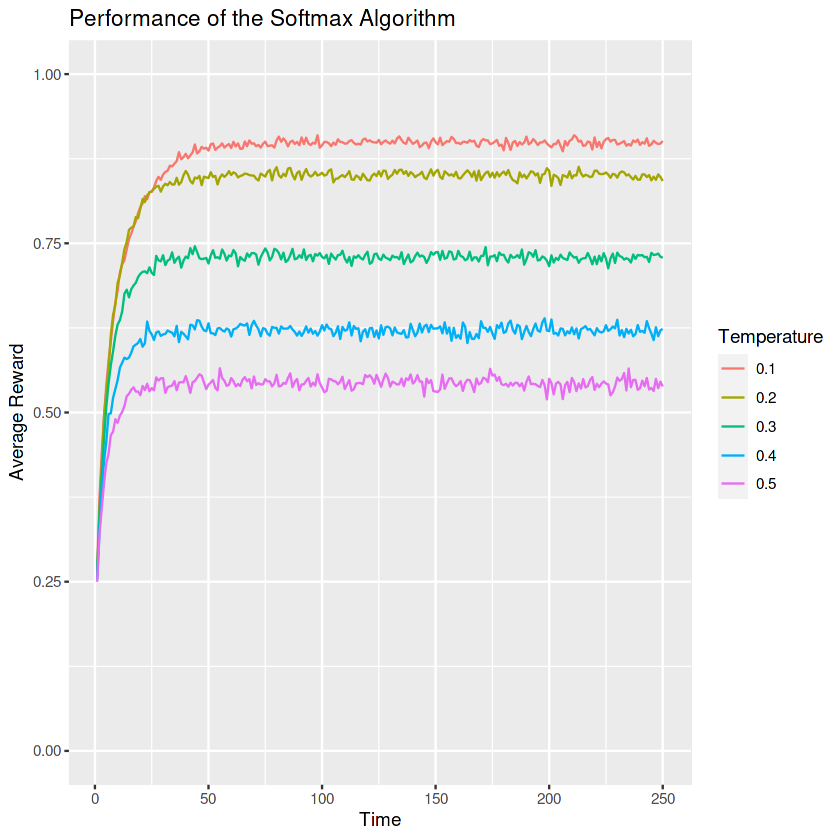

In [2]:
# Plot average reward as a function of time.
stats <- ddply(results,
               c("Temperature", "T"),
               function (df) {mean(df$Reward)})
ggplot(stats, aes(x = T, y = V1, group = Temperature, color = Temperature)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Average Reward") +
  ggtitle("Performance of the Softmax Algorithm")
#ggsave("r/graphs/standard_softmax_average_reward.pdf")



# Approach1. Plot frequency of selecting correct arm as a function of time.
In here best arm is 2

we see taht it starts to select the right arm 100% of the time if we wait long enough!

-> 입실론 그리디와 겹쳐서 비교하는 건 comparison 파트에 있지만, 벌써 더 성능이 좋다는 것을 알 수 있음

그리디 알고리즘과 달리 temperature이 0.1인 한 특정 arm이 뚜렷이 좋은 성과를 냄.

averagereward rate plot에서와 같은 결과

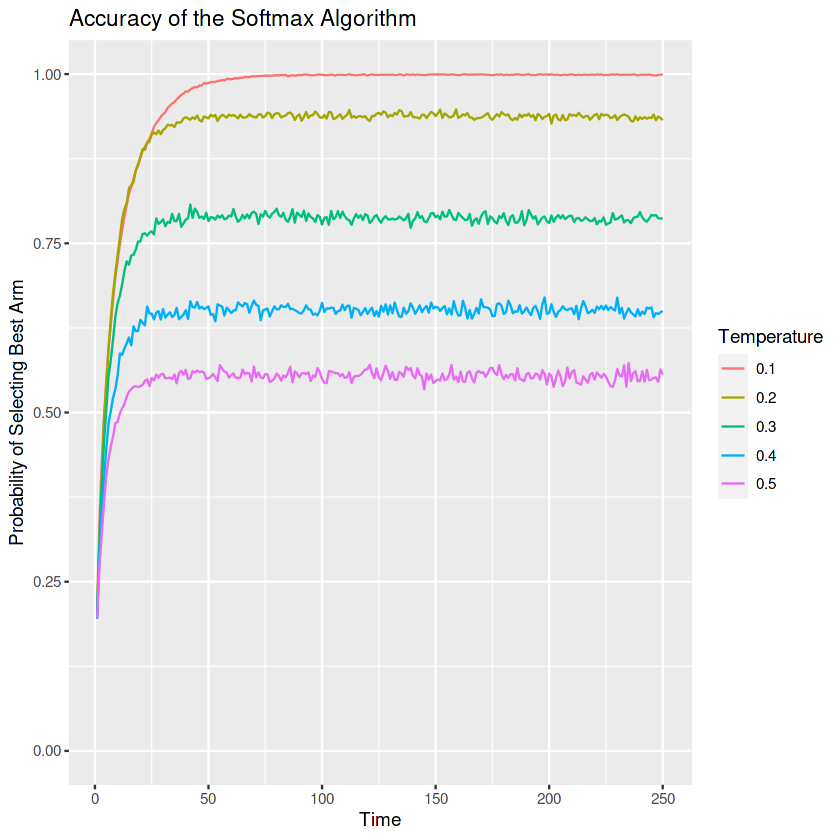

In [3]:
# Plot frequency of selecting correct arm as a function of time.
# In this instance, 5 is the correct arm.
stats <- ddply(results,
               c("Temperature", "T"),
               function (df) {mean(df$ChosenArm == 2)})
ggplot(stats, aes(x = T, y = V1, group = Temperature, color = Temperature)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Probability of Selecting Best Arm") +
  ggtitle("Accuracy of the Softmax Algorithm")
#ggsave("r/graphs/standard_softmax_average_accuracy.pdf")



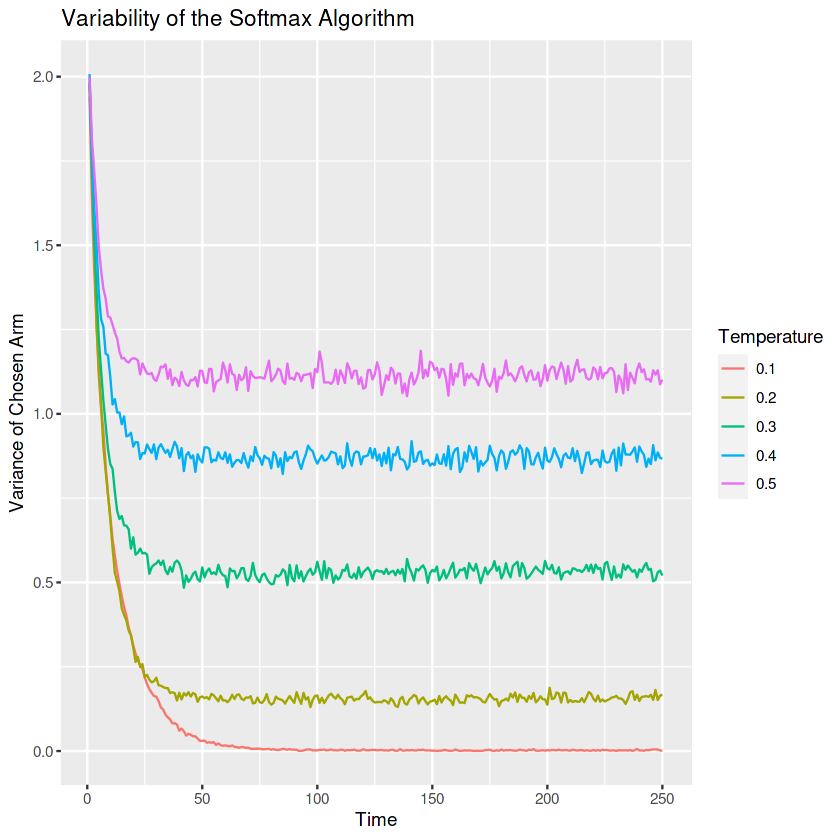

In [4]:
# Plot variance of chosen arms as a function of time.
stats <- ddply(results,
               c("Temperature", "T"),
               function (df) {var(df$ChosenArm)})
ggplot(stats, aes(x = T, y = V1, group = Temperature, color = Temperature)) +
  geom_line() +
  xlab("Time") +
  ylab("Variance of Chosen Arm") +
  ggtitle("Variability of the Softmax Algorithm")
#ggsave("r/graphs/standard_softmax_variance_choices.pdf")



# Approach3. Track the Cumulative Reward at Each pint in Time

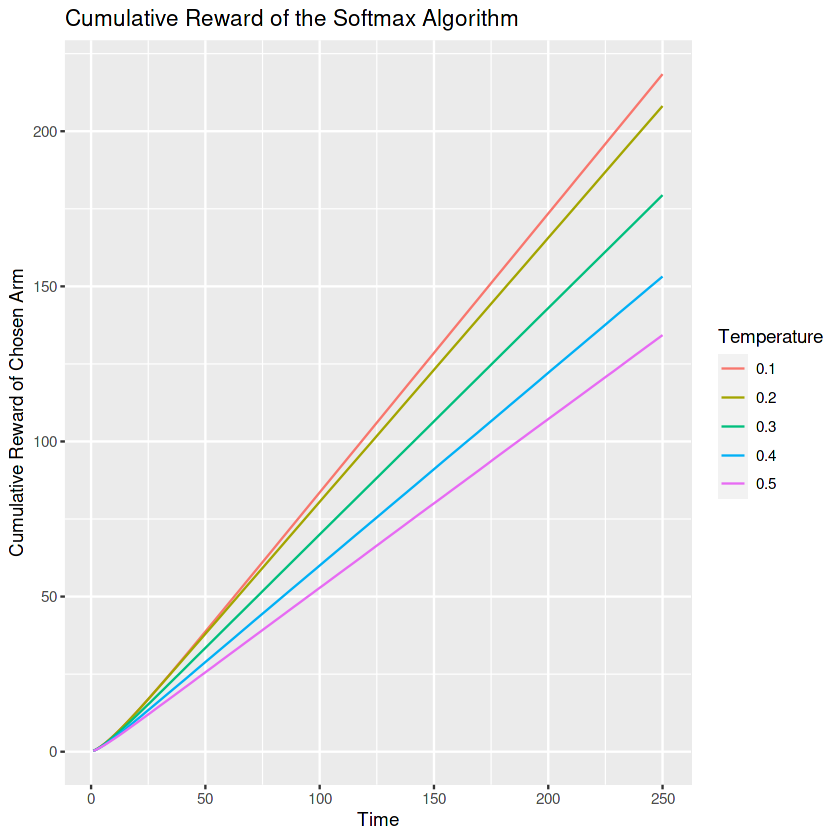

In [5]:
# Plot cumulative reward as a function of time.
stats <- ddply(results,
               c("Temperature", "T"),
               function (df) {mean(df$CumulativeReward)})
ggplot(stats, aes(x = T, y = V1, group = Temperature, color = Temperature)) +
  geom_line() +
  xlab("Time") +
  ylab("Cumulative Reward of Chosen Arm") +
  ggtitle("Cumulative Reward of the Softmax Algorithm")
#ggsave("r/graphs/standard_softmax_cumulative_reward.pdf")